# EDA

Neste momento, iremos buscar entender um pouco mais a base que acabamos de trazer na etapa anterior. 

Iremos dividir esta estapa em 2 grandes blocos, análise diretamente sobre o Cartola, análise sobre os times via base Confrontos.



Ideias::::

1. Trazer uma redução de dimensionalidade nas variáveis de scouts, trazendo + facilidade para interpretação posterior do modelo

In [1]:
import os
os.chdir(f"{os.getcwd()}\\data")

'C:\\Users\\thiag\\OneDrive\\Área de Trabalho\\GitHub\\Cartola'

In [5]:
os.listdir()[:5]

['Base_Cartola_2021_rodada_1.csv',
 'Base_Cartola_2021_rodada_10.csv',
 'Base_Cartola_2021_rodada_11.csv',
 'Base_Cartola_2021_rodada_12.csv',
 'Base_Cartola_2021_rodada_13.csv']

## Base Cartola

Temos em nossa base 2 grupos de scouts, os positivos e os negativos


* SCOUTS POSITIVOS

  1. DS - Desarme (+ 1,0)

  2. G - Gol (+8,0)

  3. A - Assistência (+5,0)

  3. SG - Saldo de Gols (sem sofrer gol) (+5,0)

  4. FS - Falta Sofrida ( +0,5)

  5. FF - Finalização para Fora (+0,8)

  6. FD - Finalização Defendida (+1,2)

  7. FT - Finalização na Trave (+3,0)

  8. PS - Pênalti Sofrido (+1,0)

  9. DE - Defesa (+1,0)

  10. DP - Defesa de Pênalti (+7,0)
  
  
* SCOUTS NEGATIVOS

  1. GC - Gol Contra (-5,0)

  2. CV - Cartão Vermelho (-5,0)

  3. CA - Cartão Amarelo (-2,0)

  4. GS - Gol Sofrido (-1,0)

  5. PP - Pênalti Perdido (-4,0)

  6. PC - Pênalti Cometido (-1,0)

  7. FC - Falta Cometida (-0,5)

  8. I - Impedimento (-0,5)

  9. PI - Passe Incompleto (-0,1)

O que iremos fazer


1. Entender a variável alvo
2. Tipos de variáveis (Categórica e numérica)
3. Valores faltantes
4. Valores numéricos
  * Discreto
  * Contínuo
  * Distribuições
  * Tranformações
5. Variáveis categóricas
  * Cardinalidade
  * Distribuição 
  * Manipulaçoes


In [33]:
import pandas as pd
import numpy as np

df_final = pd.DataFrame()
for i in range(1,18):
    df = pd.read_csv(f'Base_Cartola_2021_rodada_{str(i)}.csv')
    df_final = pd.concat([df,df_final],ignore_index=True)

In [26]:
df_final

,rodada,apelido,atleta_id,posicao_id,clube_id,entrou_em_campo,pontuacao,CA,DS,FC,...,G,DP,PC,PP,CV,PS,GC,clube_nome,posicao_nome,posicao_abreviacao
0,17,Zaracho,100079,4,282,True,1.3,0,2,2,...,0,0,0,0,0,0,0,Atlético-MG,Meia,mei
1,17,Igor Gomes,100084,4,276,True,0.4,0,1,1,...,0,0,0,0,0,0,0,São Paulo,Meia,mei
2,17,Paulinho Bóia,100333,5,286,True,1.7,0,1,1,...,0,0,0,0,0,0,0,Juventude,Atacante,ata
3,17,Yuri Alberto,100652,5,285,True,12.6,0,3,0,...,1,0,0,0,0,0,0,Internacional,Atacante,ata
4,17,Liziero,100761,4,276,True,-1.6,1,1,1,...,0,0,0,0,0,0,0,São Paulo,Meia,mei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,1,Derlan,98945,3,315,True,-0.4,0,0,0,...,0,0,0,0,0,0,0,Chapecoense,Zagueiro,zag
5388,1,Viña,98974,2,275,True,-2.5,1,0,1,...,0,0,0,0,0,0,0,Palmeiras,Lateral,lat
5389,1,Lucas Braga,99119,5,277,True,-0.8,0,0,0,...,0,0,0,0,0,0,0,Santos,Atacante,ata
5390,1,Michael,99392,5,262,True,0.7,0,0,1,...,0,0,0,0,0,0,0,Flamengo,Atacante,ata


In [13]:
df.columns

Index(['rodada', 'apelido', 'atleta_id', 'posicao_id', 'clube_id',
       'entrou_em_campo', 'pontuacao', 'CA', 'DS', 'FC', 'FS', 'PI', 'FD', 'I',
       'FF', 'FT', 'SG', 'A', 'DE', 'GS', 'G', 'DP', 'PC', 'PP', 'CV', 'PS',
       'GC', 'clube_nome', 'posicao_nome', 'posicao_abreviacao'],
      dtype='object')

In [40]:
df_final.pontuacao.isnull().sum()

0

In [39]:
df_final.pontuacao.describe()

count    5392.000000
mean        2.550182
std         3.658038
min        -7.300000
25%         0.000000
50%         1.600000
75%         4.400000
max        28.400000
Name: pontuacao, dtype: float64

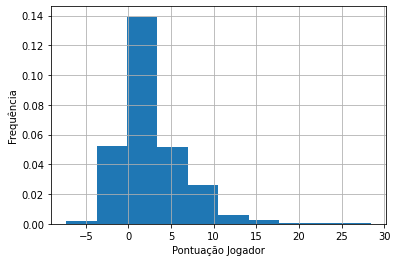

In [32]:
from matplotlib import pyplot as plt
df_final.pontuacao.hist(density=True)
plt.ylabel("Frequência")
plt.xlabel("Pontuação Jogador")
plt.show()

In [21]:
df[df.clube_nome == "Fluminense"]

,rodada,apelido,atleta_id,posicao_id,clube_id,entrou_em_campo,pontuacao,CA,DS,FC,...,G,DP,PC,PP,CV,PS,GC,clube_nome,posicao_nome,posicao_abreviacao
9,17,Nonato,100987,4,266,True,0.50,0,0,0,...,0,0,0,0,0,0,0,Fluminense,Meia,mei
66,17,André,107498,4,266,True,4.00,0,4,3,...,0,0,0,0,0,0,0,Fluminense,Meia,mei
70,17,Luiz Henrique,109282,5,266,True,-2.00,1,2,3,...,0,0,0,0,0,0,0,Fluminense,Atacante,ata
73,17,Martinelli,109573,4,266,True,4.90,0,4,0,...,0,0,0,0,0,0,0,Fluminense,Meia,mei
82,17,Gabriel Teixeira,110760,4,266,True,2.00,0,1,0,...,0,0,0,0,0,0,0,Fluminense,Meia,mei
101,17,Fred,38162,5,266,True,8.60,0,0,2,...,1,0,0,0,0,0,0,Fluminense,Atacante,ata
110,17,Nenê,38913,4,266,True,-0.20,0,0,0,...,0,0,0,0,0,0,0,Fluminense,Meia,mei
116,17,Egídio,42145,2,266,True,1.50,0,3,0,...,0,0,0,0,0,0,0,Fluminense,Lateral,lat
131,17,Lucca,61149,5,266,True,4.50,0,4,5,...,0,0,0,0,0,0,0,Fluminense,Atacante,ata
178,17,Samuel Xavier,73384,2,266,True,-0.70,0,0,0,...,0,0,0,0,0,0,0,Fluminense,Lateral,lat
